# DIGITAL EPIDEMIOLOGY 2017 ASSIGNMENT 2
##### 1766907 Ece Gultan, 1772729 Ahmed Mostafa
##### Chronic Condition: Diabetes

In [1]:
import pandas
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error
import math
import numpy as np

# Loading data
dataFrame= pandas.DataFrame.from_csv("Aggregated_Data.csv")

- Ground Truth Data: From the Behavioural Risk Factor Surveillance System database of the US Center for Disease Control and Prevention, we got the data. Among the "Chronic Health Indicators", we picked the "Diabetes". We got the data for both of the types, which are Crude Prevalence and Age-Adjusted Prevalence. The data is collected per state and for the years from 2011 to 2016 and shows the percentage of people who have diabetes
- Digital Proxy Data: From Google Trends we searched for keywords related to the diabetes. We collected the data for the same time interval with the ground truth data and per state.


### PART 1

### 1.1 The correlation of the ground truth data and the Google Trends data is studied. Both for Crude Prevalence and Age Adjusted Prevalence features of ground truth data.

We picked many keywords and got the data from Google Trends. Among them we choose the most relevant ones. The selected keywords are diabetic, metformin, pancreas, diabetes, insulin, cataract, glucose, diabetes mellitus, retinopathy, hypoglycemia, diabtes type 2, a1c, diabetes sypmtoms.

#### Correlation of Ground Truth Data and Google Trends Data : Crude prevalence feature of ground truth data is used

In [2]:
# showing correlation 
dataFrame.corr()[-1:]

cor1 = dataFrame.loc[dataFrame['Year'] == '‘2011’'].corr()[-1:]
cor1 = cor1.append(dataFrame.loc[dataFrame['Year'] == '‘2012’'].corr()[-1:])
cor1 = cor1.append(dataFrame.loc[dataFrame['Year'] == '‘2013’'].corr()[-1:])
cor1 = cor1.append(dataFrame.loc[dataFrame['Year'] == '‘2014’'].corr()[-1:])
cor1 = cor1.append(dataFrame.loc[dataFrame['Year'] == '‘2015’'].corr()[-1:])
cor1 = cor1.append(dataFrame.loc[dataFrame['Year'] == '‘2016’'].corr()[-1:])


cor1.index = range(2011,2017)
cor1 = cor1.iloc[:,:-4]

cor1

,diabetic,Metformin,pancreas,diabetes,Insulin,cataract,glucose,Diabetes mellitus,Retinopathy,hypoglycemia,diabetes type 2,a1c,neuropathy,diabetes symptoms
2011,0.684300,0.480329,0.058521,0.340907,0.307660,0.087601,0.232513,0.343778,0.140938,0.249971,0.159815,0.170977,0.425102,0.391346
2012,0.610793,0.715581,0.259645,0.374800,0.339696,0.005081,0.158966,0.057583,0.070343,0.322902,-0.046084,0.011191,0.546624,0.283026
2013,0.709250,0.579086,0.442959,0.393545,0.270214,0.242656,0.208922,0.155252,0.252576,0.280475,0.448649,0.352650,0.490348,0.240757
2014,0.711540,0.640068,0.238692,0.328025,0.368343,0.180239,0.263985,0.523788,0.365457,0.109175,0.164504,0.353470,0.374434,0.084758
2015,0.756503,0.598271,0.337353,0.331939,0.378120,0.124172,0.092642,0.225282,0.197371,0.313695,0.094554,0.503283,0.407183,0.035452
2016,0.793860,0.743396,0.580839,0.348451,0.503191,-0.001451,0.357334,0.643065,0.371684,0.233225,0.341785,0.490041,0.548282,0.409899


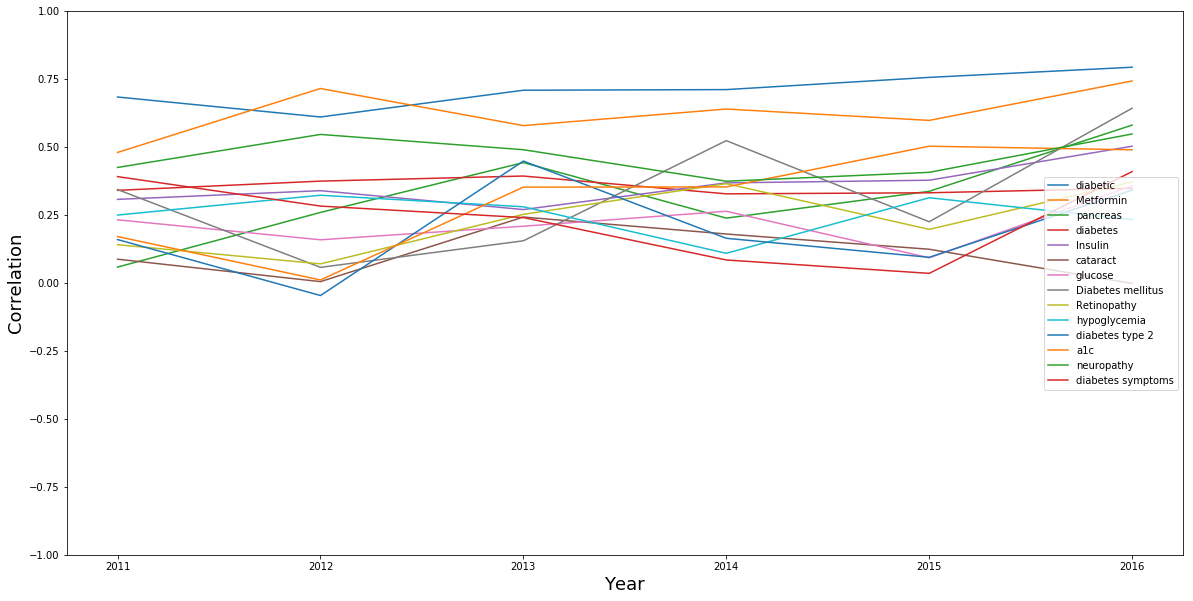

In [3]:
plt.figure(figsize=(20,10))
plt.plot(cor1)
plt.ylim(-1.0, 1.0)
plt.ylabel("Correlation", size=18)
plt.xlabel("Year", size=18)
plt.legend(cor1.columns, loc=7)
# cor1.plot()
plt.show()

#### Correlation of Ground Truth Data and Google Trends Data : Age adjusted prevalence feature of ground truth data is used

In [4]:
#Getting the data with age adjusted prevelance
dataFrameA= pandas.DataFrame.from_csv("Aggregated_Data_AA.csv")

# showing correlation 
dataFrameA.corr()[-1:]

cor2 = dataFrameA.loc[dataFrame['Year'] == '‘2011’'].corr()[-1:]
cor2 = cor2.append(dataFrameA.loc[dataFrame['Year'] == '‘2012’'].corr()[-1:])
cor2 = cor2.append(dataFrameA.loc[dataFrame['Year'] == '‘2013’'].corr()[-1:])
cor2 = cor2.append(dataFrameA.loc[dataFrame['Year'] == '‘2014’'].corr()[-1:])
cor2 = cor2.append(dataFrameA.loc[dataFrame['Year'] == '‘2015’'].corr()[-1:])
cor2 = cor2.append(dataFrameA.loc[dataFrame['Year'] == '‘2016’'].corr()[-1:])


cor2.index = range(2011,2017)
cor2 = cor2.iloc[:,:-4]

cor2

,diabetic,Metformin,pancreas,diabetes,Insulin,cataract,glucose,Diabetes mellitus,Retinopathy,hypoglycemia,diabetes type 2,a1c,neuropathy,diabetes symptoms
2011,0.614687,0.441507,-0.021142,0.248963,0.172933,-0.038412,0.114384,0.259971,0.027036,0.205411,0.148039,0.099081,0.293844,0.434400
2012,0.556018,0.713711,0.180036,0.285139,0.231170,-0.145914,-0.009074,0.008330,-0.037438,0.263713,-0.092583,0.072782,0.411662,0.301766
2013,0.641987,0.554516,0.341673,0.311369,0.187787,0.114669,0.093426,0.068767,0.134471,0.254669,0.395049,0.320420,0.371996,0.279019
2014,0.656095,0.640100,0.149011,0.264972,0.273330,0.041703,0.150616,0.529976,0.310902,0.072878,0.074049,0.293641,0.282492,0.132751
2015,0.721867,0.567581,0.274186,0.300881,0.284994,-0.012738,0.018876,0.182731,0.077933,0.322773,0.087207,0.450135,0.319322,0.062240
2016,0.762775,0.781513,0.482729,0.319380,0.420316,-0.057207,0.267512,0.617492,0.311674,0.262207,0.257318,0.469141,0.430532,0.432859


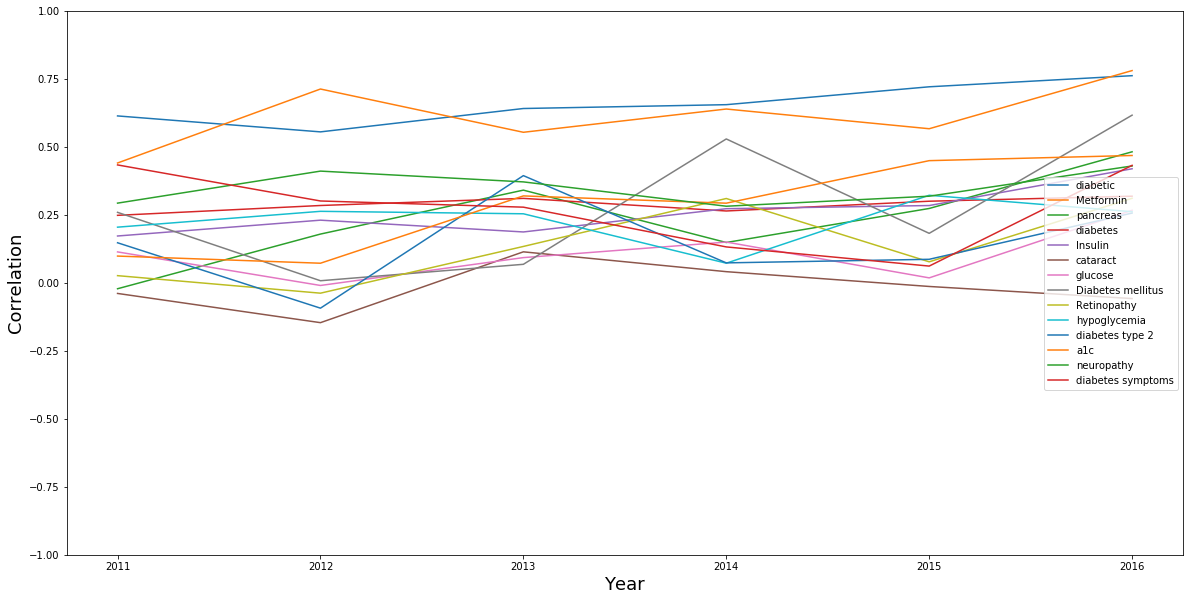

In [5]:
plt.figure(figsize=(20,10))
plt.plot(cor2)
plt.ylim(-1.0, 1.0)
plt.ylabel("Correlation", size=18)
plt.xlabel("Year", size=18)
plt.legend(cor2.columns, loc=7)
plt.show()

From the tables and the graphs above we can observe the stability of the correlations. Both for the crude prevalence and age adjusted prevalence we can say that the words "diabetic", "metformin", "diabates", "insulin" and "neuropathy" are the most stable ones, the correlation of one year hold in other years. But the others are differ by year. Especially for "pancreas", "diabetes mellitus" and "diabetes type 2", the lack of stability can be observed significantly, the correlation of these variables should be given less authority. 

### 1.2 The correlation of target ground truth feature(Crude Prevelance) with income and poverty feature

### Income

In [6]:
# showing correlation 
dataFrame.corr()[-1:]

cor3 = dataFrame.loc[dataFrame['Year'] == '‘2011’'].corr()[-1:]
cor3 = cor3.append(dataFrame.loc[dataFrame['Year'] == '‘2012’'].corr()[-1:])
cor3 = cor3.append(dataFrame.loc[dataFrame['Year'] == '‘2013’'].corr()[-1:])
cor3 = cor3.append(dataFrame.loc[dataFrame['Year'] == '‘2014’'].corr()[-1:])
cor3 = cor3.append(dataFrame.loc[dataFrame['Year'] == '‘2015’'].corr()[-1:])
cor3 = cor3.append(dataFrame.loc[dataFrame['Year'] == '‘2016’'].corr()[-1:])


cor3.index = range(2011,2017)
cor3 = cor3.iloc[:,14:15]

cor3

,Income
2011,-0.615668
2012,-0.590993
2013,-0.645889
2014,-0.616571
2015,-0.673733
2016,-0.637420


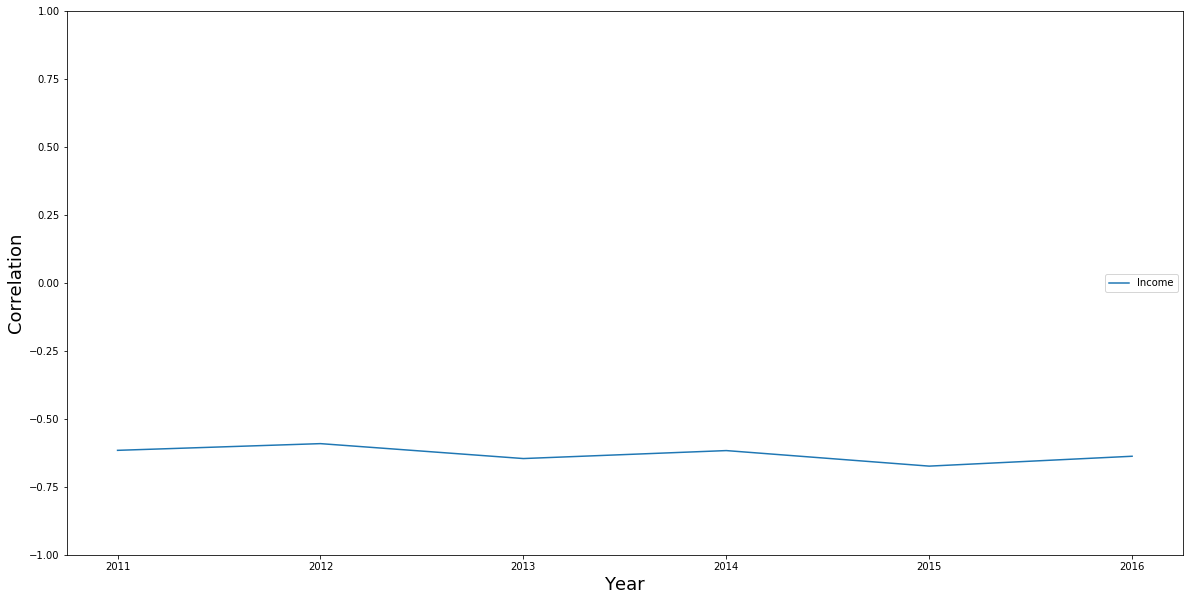

In [7]:
plt.figure(figsize=(20,10))
plt.plot(cor3)
plt.ylim(-1.0, 1.0)
plt.ylabel("Correlation", size=18)
plt.xlabel("Year", size=18)
plt.legend(cor3.columns, loc=7)
plt.show()

US state-level data on income is collected from the US Census Bureau and correlation of ground truth data with crude prevalence feature and income data is calculated. Income and our ground truth data is correlated negatively and the correlation is stable among the years. Since income effects the life standards, eating habbits and health, we can say that income may also have effect on diabetes and people with less income may be more likely to have diabetes.

### Poverty

In [8]:
# showing correlation 
dataFrame.corr()[-1:]

cor5 = dataFrame.loc[dataFrame['Year'] == '‘2011’'].corr()[-1:]
cor5 = cor5.append(dataFrame.loc[dataFrame['Year'] == '‘2012’'].corr()[-1:])
cor5 = cor5.append(dataFrame.loc[dataFrame['Year'] == '‘2013’'].corr()[-1:])
cor5 = cor5.append(dataFrame.loc[dataFrame['Year'] == '‘2014’'].corr()[-1:])
cor5 = cor5.append(dataFrame.loc[dataFrame['Year'] == '‘2015’'].corr()[-1:])
cor5 = cor5.append(dataFrame.loc[dataFrame['Year'] == '‘2016’'].corr()[-1:])


cor5.index = range(2011,2017)
cor5 = cor5.iloc[:,16:17]

cor5

,Poverty
2011,0.711243
2012,0.662169
2013,0.674526
2014,0.702211
2015,0.770829
2016,0.663603


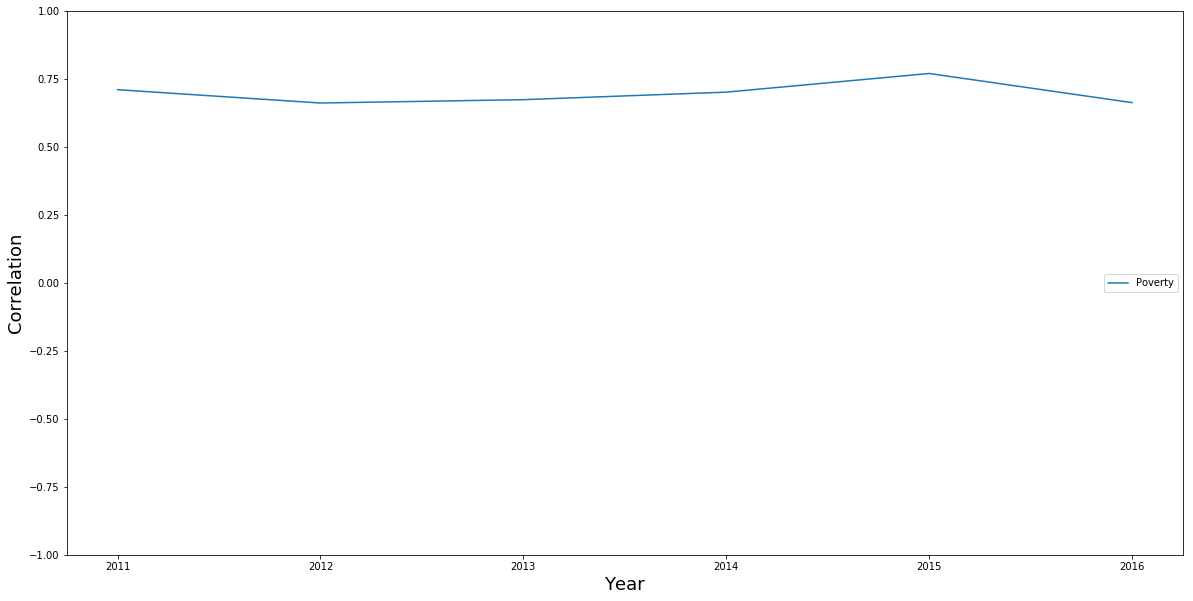

In [9]:
plt.figure(figsize=(20,10))
plt.plot(cor5)
plt.ylim(-1.0, 1.0)
plt.ylabel("Correlation", size=18)
plt.xlabel("Year", size=18)
plt.legend(cor5.columns, loc=7)
plt.show()

The correlation of ground truth data with crude prevalence feature and income data are shown on the table and graph above. They are positively correlated and the correlation is stable among the years. 

### PART 2

### 2.1

### Setting up a regression model

We set up a regression model which predicts the ground truth data on the basis of Google Trends data for keywords.We are using Ridge Regression as our model. We also tried Lasso and LassoCv, but Ridge gives us better results. 

In [10]:
locationLabels = dataFrame['State_Group']
YearLabels = dataFrame['Year']

While we are selecting the keywords, in the first step we considered the correlations of the ground truth data and keywords and the stability is also considered. For example "diabetic" and "metformin" have the highest correlations and we can say that they are stable among years. So they are good candidates to be used for the prediction. Then we run our model with and without several keywords and analyze the results. According to the evaluation, our model gives better results when we remove the keywords 'glucose', 'diabetes mellitus', diabetes type 2' and 'diabetes sypmtoms'. 

In [11]:
X = dataFrame.iloc[:,3:-1]
# X = (X - X.mean()) / (X.max() - X.min())

del X['Income']
del X['Insurance']
del X['Poverty']
#del X['cataract']
del X['glucose']
del X['Diabetes mellitus']
del X['diabetes type 2']
del X['diabetes symptoms']
#del X['pancreas']
#del X['diabetes']
#del X['Insulin']
#del X['a1c']
#del X['Retinopathy']
#del X['hypoglycemia']
#del X['diabetic']
#del X['Metformin']


# X

In [12]:
Y = dataFrame['GT']

#Y

In [13]:
def perform_regression(X,Y, groups):
    logo = LeaveOneGroupOut()
    scoreValArr = []
    RMSEs = []
    reg = linear_model.Ridge (alpha = .1, normalize=True)
    for train_index, test_index in logo.split(X, Y, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        scoreVal = reg.score(X_test, y_test)
        scoreValArr.append(scoreVal)
        s = mean_squared_error(y_test, y_pred)  
        RMSEs.append(math.sqrt(s))

    return (RMSEs, scoreValArr)


Our data has spatial and temporal structures. While we are performing cross validation, These spatial and temporal structures are ignored during cross validation. This causes underestimation of prediction error. To overcome this problem, we split our data into the blocks before applying cross validation.

### Spatial Cross Validation

For the spatial cross validation, we split our data into 7 blocks of states. Each time we leave one block out and train the data with the rest. Afterwards test on the seperated data.

In [14]:
res = perform_regression(X,Y,locationLabels)
print("RMSE = ", np.mean(res[0]))
print("Score = ", np.mean(res[1]))

RMSE =  1.1765688488
Score =  0.387044050974


### Temporal Cross Validation

In the case of the temporal cross validation, we split our data into the blocks of years. Each time we leave one block of year out and train the data with the rest, then test on the separeted data. 

In [15]:
res = perform_regression(X,Y,YearLabels)
print("RMSE = ", np.mean(res[0]))
print("Score = ", np.mean(res[1]))

RMSE =  1.21086629277
Score =  0.412937556922


We can see that the model generalizes using both Spatial and Temporal CV  

### 2.2 Model with income and poverty features

##### Adding Income

By adding income feature to data, the prediction model is improved. The reason is that there is a significant and stable correlation of income and ground truth data.

In [16]:
X = dataFrame.iloc[:,3:-1]
# X = (X - X.mean()) / (X.max() - X.min())
#del X['Income']
del X['Poverty']
del X['Insurance']
del X['glucose']
del X['Diabetes mellitus']
del X['diabetes type 2']
del X['diabetes symptoms']

# X

In [17]:
print("Using spatial cv:")
res = perform_regression(X,Y,locationLabels)
print("RMSE = ", np.mean(res[0]))
print("Score = ", np.mean(res[1]))

print("Using temporal cv:")
res = perform_regression(X,Y,YearLabels)
print("RMSE = ", np.mean(res[0]))
print("Score = ", np.mean(res[1]))

Using spatial cv:
RMSE =  1.14144926937
Score =  0.447031927504
Using temporal cv:
RMSE =  1.19069325587
Score =  0.431968701887


##### Adding Poverty 

When Poverty feature included in data, the prediction model is improved. It results with a greater improvement than adding income, since the correlation of poverty and ground trtuh data is higher than the correlation of income and ground truth data.

In [18]:
X = dataFrame.iloc[:,3:-1]
# X = (X - X.mean()) / (X.max() - X.min())
del X['Income']
#del X['Poverty']
del X['Insurance']
del X['glucose']
del X['Diabetes mellitus']
del X['diabetes type 2']
del X['diabetes symptoms']

# X

In [19]:
print("Using spatial cv:")
res = perform_regression(X,Y,locationLabels)
print("RMSE = ", np.mean(res[0]))
print("Score = ", np.mean(res[1]))

print("Using temporal cv:")
res = perform_regression(X,Y,YearLabels)
print("RMSE = ", np.mean(res[0]))
print("Score = ", np.mean(res[1]))

Using spatial cv:
RMSE =  1.05620087069
Score =  0.520012992087
Using temporal cv:
RMSE =  1.12855036456
Score =  0.494503170764


### 2.3 Model with health insurance feature

The insurance data show percentage of people without health insurance coverage. 

### Correlation of ground truth data and insurance

In [20]:
# showing correlation 
dataFrame.corr()[-1:]

cor4 = dataFrame.loc[dataFrame['Year'] == '‘2011’'].corr()[-1:]
cor4 = cor4.append(dataFrame.loc[dataFrame['Year'] == '‘2012’'].corr()[-1:])
cor4 = cor4.append(dataFrame.loc[dataFrame['Year'] == '‘2013’'].corr()[-1:])
cor4 = cor4.append(dataFrame.loc[dataFrame['Year'] == '‘2014’'].corr()[-1:])
cor4 = cor4.append(dataFrame.loc[dataFrame['Year'] == '‘2015’'].corr()[-1:])
cor4 = cor4.append(dataFrame.loc[dataFrame['Year'] == '‘2016’'].corr()[-1:])


cor4.index = range(2011,2017)
cor4 = cor4.iloc[:,15:16]

cor4

,Insurance
2011,0.383804
2012,0.323221
2013,0.372381
2014,0.241319
2015,0.270060
2016,0.202206


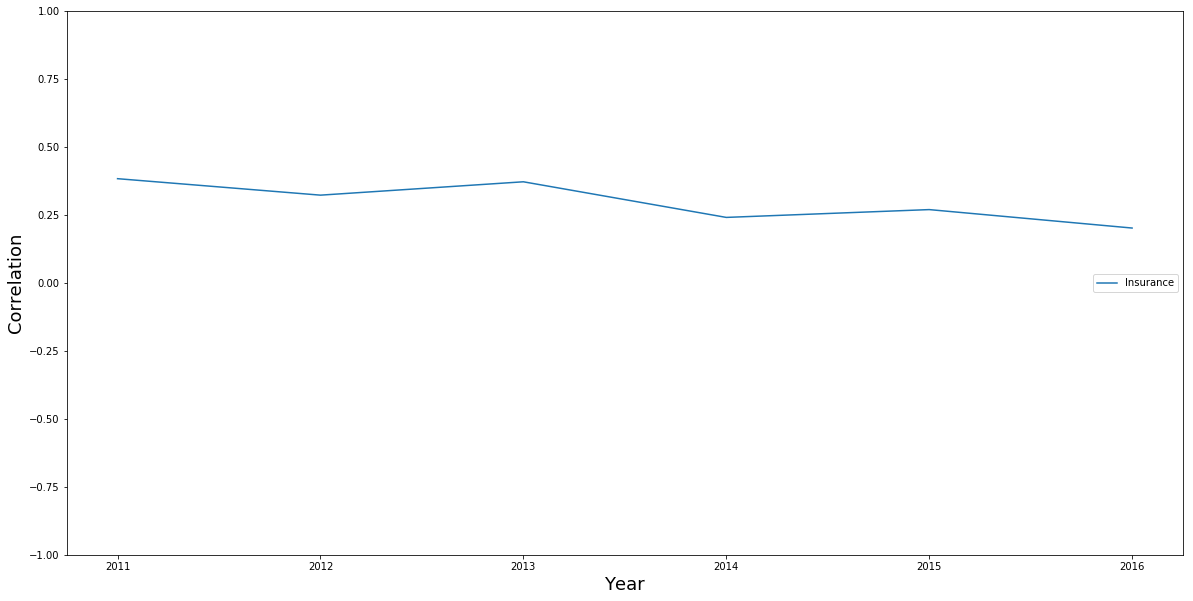

In [21]:
plt.figure(figsize=(20,10))
plt.plot(cor4)
plt.ylim(-1.0, 1.0)
plt.ylabel("Correlation", size=18)
plt.xlabel("Year", size=18)
plt.legend(cor4.columns, loc=7)
plt.show()

Here insurance data included in the prediction model. 

In [22]:
X = dataFrame.iloc[:,3:-1]
X = (X - X.mean()) / (X.max() - X.min())
del X['Income']
#del X['Insurance']
del X['Poverty']
del X['cataract']
del X['glucose']
del X['Diabetes mellitus']
del X['diabetes type 2']
del X['diabetes symptoms']

# X

In [23]:
print("Using spatial cv:")
res = perform_regression(X,Y,locationLabels)
print("RMSE = ", np.mean(res[0]))
print("Score = ", np.mean(res[1]))

print("Using temporal cv:")
res = perform_regression(X,Y,YearLabels)
print("RMSE = ", np.mean(res[0]))
print("Score = ", np.mean(res[1]))

Using spatial cv:
RMSE =  1.1841615198
Score =  0.37959126836
Using temporal cv:
RMSE =  1.22718147619
Score =  0.388843444425


Insurance and ground truth data have a weak positive correlation. Adding insurance feature to our data ended up with poor results both for spatial and temporal cross validation. 